- 패키지 임포트

In [5]:
#시험전에 임포트
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston, load_breast_cancer
from sklearn.svm import LinearSVC, SVC, LinearSVR, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, VotingRegressor, StackingClassifier, StackingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMClassifier, LGBMRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings('ignore')

## 1. SVM(서포트 벡터 머신)
201p
- 분류, 예측 모두 사용
- 정규화 필요
- 예측 정확도가 높음
- 고차원, 저차원에 모두 잘 작동
- 범주형 변수를 독립변수로 사용할 수 없어 더미변환

<단점>
- 과대적합, 과소적합을 피하기 위해서는 매개변수 설정이 필요(파라미터값 조정)
- 모델의 해석이 어렵다
- 대용량 데이터 구축시 속도가 느리며 과적합, 이상치에 민감
- 과적합과 이상치에 민감

<파라미터>
- C : 항상 양수여야함

## 1-1. 분류(LinearSVC)

- 데이터 가져오기

In [19]:
data1=pd.DataFrame(load_breast_cancer().data, columns=load_breast_cancer().feature_names)
data1['target']=load_breast_cancer().target

In [20]:
X1=data1.iloc[:, :-1]
y1=data1[['target']]

In [21]:
#스케일에 민감, 정규화 필요
scaler = StandardScaler()
X1_scaled=scaler.fit_transform(X1)

In [22]:
#train/test분리
X1_train, X1_test, y1_train, y1_test=train_test_split(X1_scaled, y1, test_size=0.2, random_state=42)

#모델생성
svc=LinearSVC(random_state=42)
svc.fit(X1_train, y1_train)
pred=svc.predict(X1_test)

#정확도
score=accuracy_score(y1_test, pred)
score

0.956140350877193

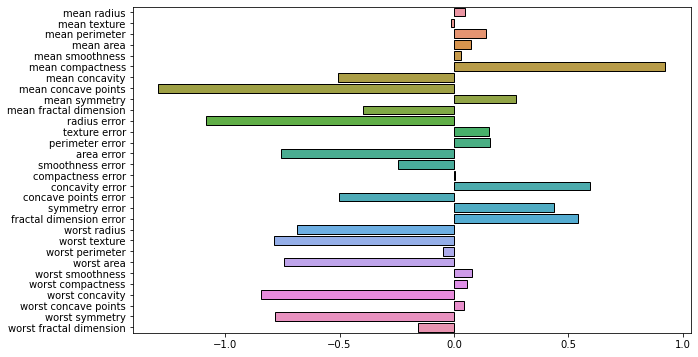

In [23]:
#변수중요도 : 모델명.coef_.tolist()[0]
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=svc.coef_.tolist()[0], edgecolor=(0,0,0))
plt.show()

In [24]:
svc=SVC(random_state=42, kernel='poly')
svc.fit(X1_train, y1_train)
pred=svc.predict(X1_test)
accuracy_score(y1_test, pred)
#->LinearSVC가 더 성능이 좋다

0.868421052631579

## 1-2. 회귀(SVR)

In [25]:
data2=pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
data2['target']=load_boston().target

data2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
X2=data2.iloc[:, :-1]
y2=data2[['target']]

In [27]:
scaler=StandardScaler()
X2_scale=scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test=train_test_split(X2_scale, y2, test_size=0.2, random_state=42)

In [28]:
svr=SVR()
svr.fit(X2_train, y2_train)
pred=svr.predict(X2_test)
mse=mean_squared_error(y2_test, pred)
mse

25.693036656663224

## 2. 의사결정나무
p231

<장점>
- 결과를 설명하기 용이하다.
- 모형을 만드는 방법이 간단하다.
- 대용량 데이터에 빠르게 만들 수 있다.
- 비정상 잡음에 대해서도 민감함 없이 분류가 가능(전처리 과정에 모델의 성능이 큰 영향을 받지 않음)
- 상관성이 높은 변수에도 크게 영향x
- 스케일링 작업이 필요하지 않다.

<단점>
- 과대적합 가능성이 높다.
- 분류 경계선 부근의 자료값에 대해 오차가 크다.
- 설명변수 간의 중요도를 판단하기 쉽지 않다.

## 2-1. 분류(DecisionTreeClassifier)

In [29]:
X1_train, X1_test, y1_train, y2_test = train_test_split(X1_scaled,y1, test_size=0.2, random_state=42)

dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X1_train, y1_train)
pred=dtc.predict(X1_test)
accuracy_score(y1_test, pred)

0.9473684210526315

<AxesSubplot:>

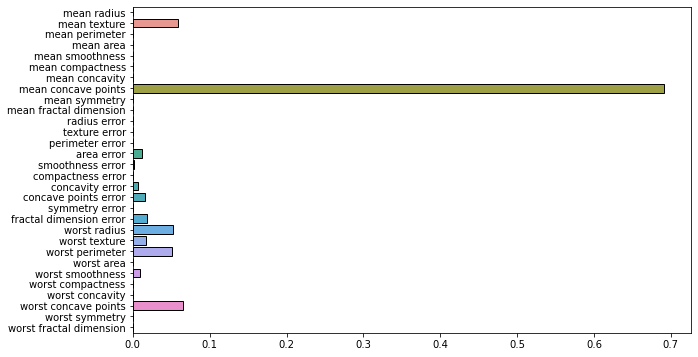

In [30]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=dtc.feature_importances_, edgecolor=(0,0,0))

## 2-2. 회귀(DecisionTreeRegressor)

In [31]:
X2_train, X2_test, y2_train, y2_test=train_test_split(X2_scale, y2, test_size=0.2, random_state=42)

dtr=DecisionTreeRegressor(random_state=42)
dtr.fit(X2_train, y2_train)
pred=dtr.predict(X2_test)

mean_squared_error(y2_test, pred)

10.416078431372549

## 3. 앙상블(부스팅) - GradientBoosting
- 부스팅은 예측력이 약한 모형들을 순차적으로 학습시켜 강한 예측모형을 만듬. 예측하면서 잘못 예측한 데이터에 대해 가중치를 부여해 오류를 개선해나가며 학습. 
- GradientBoosting(GBM)은 가중치 업데이트에 Gradient Descent(경사하강법)을 이용
- 정의된 손실함수를 기준으로 오차를 계산하고 트리 기반의 약한 학습기를 만들어 오차를 줄일 수 있도록 가중치를 갱신하여 학습 진행

<장점>
- 배깅에 비해 모델의 장점을 최적화하고 Train데이터에 대해 오류가 적은 결합모델을 생성할 수 있음

<단점>
- 과적합 위험성

## 3-1. 분류(GradientBoostingClassifier)

In [32]:
gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X1_train, y1_train)
pred=gbc.predict(X1_test)
accuracy_score(y1_test, pred)

0.956140350877193

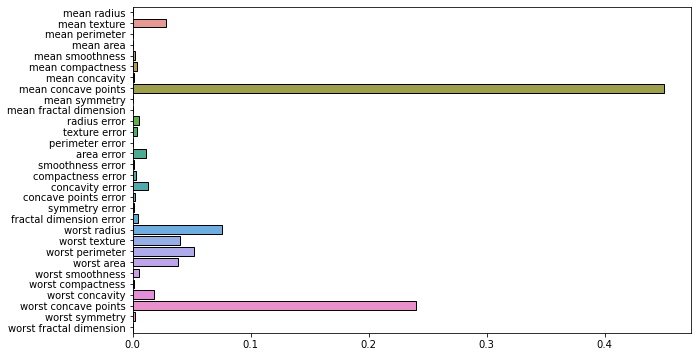

In [33]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=gbc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 3-2. 회귀(GradientBoostingRegressor)

In [39]:
gbr=GradientBoostingRegressor(random_state=42)
gbr.fit(X2_train, y2_train)
pred=gbr.predict(X2_test)
mean_squared_error(y2_test, pred)

6.208180149640464

## 4. 앙상블(부스팅) - XGBoost
- GBM을 기반으로함, 느린 수행시간 및 과적합 규제 부재 등의 문제를 해결하였다.
- 특히 병렬 CPU 환경에서 병렬학습이 가능해 기존 GBM보다 빠르게 학습 가능

<장점>
- 뛰어난 예측 성능
- GBM대비 빠른 수행 시간
- 과적합 규제
- 나무 가지치기 : 가지치기로 긍정 이득이 더 이상 없는 분할은 분할 수를 줄이는 장점
- 자체 내장된 교차 검증
- 결손값 자체 처리

## 4-1. 분류(XGBClassifier)

In [35]:
xgbc=XGBClassifier(random_state=42)
xgbc.fit(X1_train, y1_train)
pred=xgbc.predict(X1_test)

In [36]:
accuracy_score(y1_test, pred)

0.956140350877193

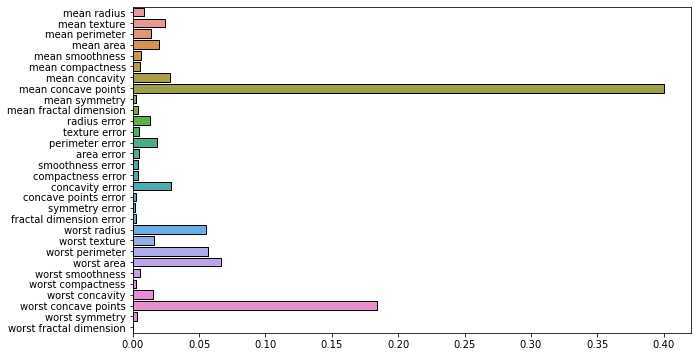

In [37]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=xgbc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 4-2. 회귀(XGBRegressor)

In [38]:
xgbr = XGBRegressor(random_state = 42)
xgbr.fit(X2_train, y2_train)
pred = xgbr.predict(X2_test)

mean_squared_error(y2_test, pred)

6.747557632786527

## 5. 앙상블(부스팅) - LGBM
- XGBoost보다 학습시간에 걸리는 시간이 훨씬 적고, 메모리 사용시간도 상대적으로 적다. 일반 GBM과 다르게 최대한 균형잡힌 트리를 유지하면서 분할하기 때문에, 트리의 깊이가 최소화 될 수 있다. 균형 잡힌 트리를 생성하는 이유는 오버피팅에 더 강한 구조를 가질 수 있기 때문인데, 반대로 균형을 맞추기 위해 시간이 필요하다는 상대적인 단점이 있다. 하지만 LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고 최대 손실값을 가지는 리프노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙트리가 생성된다.

<장점>
- 더 빠른 학습과 예측 수행시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동변환과 최적 분할

<단점>
- 적은데이터에 적용할 경우 과적합 발생이 쉬움

## 5-1. 분류(LGBMClassifier)

In [42]:
lgbc=LGBMClassifier(random_state=42)
lgbc.fit(X1_train, y1_train)
pred=lgbc.predict(X1_test)
accuracy_score(y1_test, pred)

0.9736842105263158

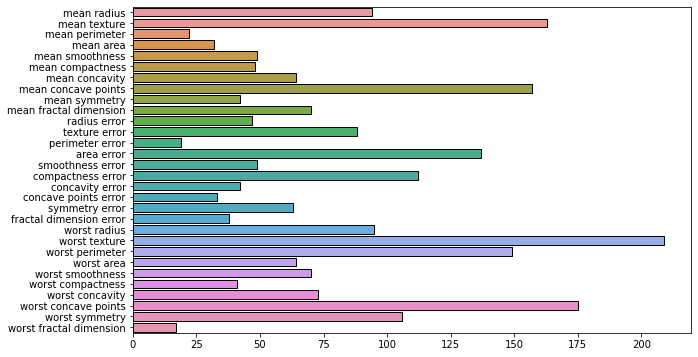

In [45]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,6))
sns.barplot(y=X1.columns.tolist(), x=lgbc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 5-2. 회귀(LGBMRegressor)

In [46]:
lgbr=LGBMRegressor(random_state=42)
lgbr.fit(X2_train, y2_train)
pred=lgbr.predict(X2_test)
mean_squared_error(y2_test, pred)

7.779711929124046

## 6. 앙상블(랜덤포레스트)
배깅이 사용되며 배깅은 같은 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘이다. 앙상블 알고리즘 중에서 비교적 빠른 속도를 가지고 있으며, 좋은 성능을 보임

랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게된다. 또한 개별 트리가 학습하는 데이터는 전체 데이터에서 일부가 중첩되게 만든 데이터이다.

<장점>
- 앙상블 알고리즘 중 비교적 빠른 속도
- 다양한 영역에서 좋은 성능을 보임
- 결정 트리의 쉽고 직관적인 장점

<단점>
- 하이퍼파라미터가 너무 많고 튜닝을 위한 시간이 많이 소모됨

## 6-1. 분류(RandomForestClassifier)

In [47]:
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X1_train, y1_train)
pred=rfc.predict(X1_test)
accuracy_score(y1_test, pred)

0.9649122807017544

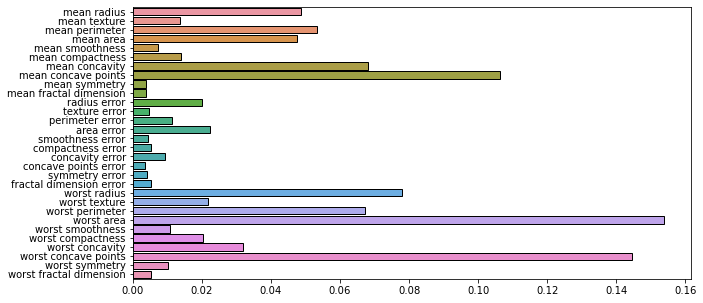

In [48]:
#변수중요도 : 모델명.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(y=X1.columns.tolist(), x=rfc.feature_importances_, edgecolor=(0,0,0))
plt.show()

## 6-2. 회귀(RandomForestRegressor)

In [49]:
rfr=RandomForestRegressor(random_state=42)
rfr.fit(X2_train, y2_train)
pred=rfr.predict(X2_test)
mean_squared_error(y2_test, pred)

7.9271453333333355

## 7. Naive Bayes(나이브 베이즈)
베이즈 정리의 조건부 독립을 가정하는 알고리즘으로 클래스에 대한 사전정보와 데이터로부터 추출된 정보를 결합하고 베이즈 정리를 이용하여 클래스 분류

<장점>
- 간단하며 빠르고 효율적인 알고리즘이다.
- 잡음과 누락 데이터를 잘 처리
- 훈련을 할 때, 데이터 크기에 상관없이 잘 동작
- 예측을 위한 추정 확률을 쉽게 얻을 수 있다.

<단점>
- 모든 특징이 동등하게 중요하고, 독립이라는 가정이 잘못된 경우가 있다.(ex:텍스트의 단어들, 일기예보를 할 때도 습도와 같은 중요한 특징을 다른 특징과 동등하다 판단하고 모델 학습)
- 수치 특지잉 많은 데이터셋에는 이상적이지 않음
- 추정된 확률이 예측된 클래스보다 덜 신뢰할만함

<활용분야>
- 스팸필터링, 이진분류, 비정상적인 상황 감지, 컴퓨터 네트워크 침입이나 비정상 행위 등을 탐지

## 7-1. 분류(GausianNB)

In [50]:
gnu=GaussianNB()
gnu.fit(X1_train, y1_train)
pred=gnu.predict(X1_test)
accuracy_score(y1_test, pred)

0.9649122807017544

## 8. KNN(K-Nearest Neighbor)
새로운 데이터의 클래스를 해당 데이터와 가장 가까운 k개의 데이터의 클래스로 결정한다.
유클리디안, 맨하탄, 민코우스키 등 다양한 거리 함수를 사용할 수 있고, 대표적으로 유클리디안 거리를 사용한다.

<장점>
- 사용이 간단함
- 범주를 나눈 기준을 몰라도 데이터를 분류할 수 있음
- 추가된 데이터의 처리가 용이함

<단점>
- k값의 결정이 어려움
- 비수치 데이터의 경우 유사도를 정의하기 어려움
- 이상치가 존재하면 성능에 큰 영향을 미침

## 8-1. 분류(KneighborsClassifier)

In [51]:
knn=KNeighborsClassifier()
knn.fit(X1_train, y1_train)
pred=knn.predict(X1_test)
accuracy_score(y1_test, pred)

0.9473684210526315

## 8-2. 회귀(KNeighborsRegressor)

In [52]:
knnr=KNeighborsRegressor()
knnr.fit(X2_train, y2_train)
pred=knnr.predict(X2_test)
mean_squared_error(y2_test, pred)

20.65732549019608

## 9. 앙상블(보팅-Voting)
일반적으로 서로 다른 알고리즘을 가진 분류기를 결합하는 방식이다.
- 하드 보팅 : 다수결 원칙
- 소프트 보팅 : 레이블 값 결정 확률을 모두 더하고 이를 평균하여 가장 높은 확률의 클래스를 결과로 선정한다.

## 9-1. 분류(VotingClassifier)

In [53]:
votc=VotingClassifier(estimators=[('lgbm', lgbc), ('xgb', xgbc), ('gbm', gbc)], voting='soft')
votc.fit(X1_train, y1_train)
pred=votc.predict(X1_test)
accuracy_score(y1_test, pred)

0.956140350877193

## 9-2. 회귀(VotingRegressor)

In [54]:
votr=VotingRegressor(estimators=[('lgbm', lgbr), ('xgb', xgbr), ('gbm', gbr)])
votr.fit(X2_train, y2_train)
pred=votr.predict(X2_test)
mean_squared_error(y2_test, pred)

6.040548824833506

## 10. 앙상블(스태킹-Stacking)
개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행
즉, 개별 알고리즘의 예측결과 데이터를 최종적인 메타 데이터로 만들어 별도의 ML알고리즘으로 최종 학습을 수행하고 예측을 수행하는 방식이다.

<장점>
- 성능을 극으로 끌어올릴 수 있음

<단점>
- 과대적합 가능성

In [55]:
est=[('lgb', lgbc), ('xgb', xgbc), ('knn', knn), ('rf', rfc), ('gb', gbc)]

sc=StackingClassifier(estimators=est, final_estimator=dtc)
sc.fit(X1_train, y1_train)
pred=sc.predict(X1_test)
accuracy_score(y1_test, pred)

0.9649122807017544